# ALUNOS: 

- Aluno1: __Antonio_____________________________________
- Aluno2: __Danilo____________________________________
- Aluno3: __Pedro___________________________________



# CIÊNCIA DE DADOS

## Etapas previstas para realizar Análise e Tratamento de Dados:
- Importar as bibliotecas necessárias 
- Importar a base de dado e realizar o merge, caso necessário
- Tratamento dos Dados
- Visualização dos dados
- Verificar a base estatística dos dados numéricos e não numéricos
- Verificar as colunas categóricas
- Análise da base de dados
- Conclusões obtidas

## Análise de Custos e Desperdícios de Materiais 

O desafio consiste no gerenciamento de recursos próprios: controlar custos crescentes, evitar desperdícios e garantir que os insumos sejam utilizados de forma eficiente e adequada. Os dados de consumo mensal trazem informações ricas sobre materiais, medicamentos, operações, centros de custo, especialidades médicas e estabelecimentos. A partir deles, é possível identificar
padrões de uso, prever demandas futuras e, principalmente, analisar perdas e desperdícios. Neste
desafio, os alunos deverão aplicar os conhecimentos adquiridos em sala de aula para explorar essas
informações e propor soluções práticas que apoiem a gestão hospitalar.

## Mineração de Dados
- Explorar e preparar os dados de consumo mensal. 
- Mapear itens com maior impacto financeiro e identificar padrões de consumo por material, operação, centro de custo e especialidade. 
- Consumos atípicos (picos sazonais não justificados).
- Itens subutilizados ou de baixa rotatividade.
- Identificar itens similares (ex.: medicamentos com a mesma finalidade terapêutica) e avaliar sobreposição de consumo.

## Inteligência Artificial
- Desenvolver modelos de previsão de consumo
- Aplicar metodologias para agrupar especialidades e centros de custo com padrões de consumo semelhantes.
- Implementar detecção de anomalias para identificar consumos desproporcionais, potenciais desperdícios e possíveis substituições por itens similares de menor custo.

## Resultados Esperados:
- Evolução do consumo mensal.
- Comparativo de consumo.
- Indicadores de perdas e desperdícios (consumo anômalo, estoques sem giro, itens de alto custo com alternativas similares).
- Previsão de consumo para apoiar planejamento de compras.
- Grupos de especialidades/centros de custo com padrões de consumo similares.
- Lista de possíveis anomalias e desperdícios detectados.
- Recomendações estratégicas para otimização do uso de recurso próprio.
Bônus: outras analises não indicadas acima


## Importar as bibliotecas necessárias e a base de dados. Realizar o merge, caso necessário e Realizar a visualização da mesma 

In [178]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Abre o arquivo Excel movimento_estoque_faturamento.xlsx sem carregar dados
xls = pd.ExcelFile('data/movimento_estoque_faturamento.xlsx')
# Pega todos os nomes de abas, exceto "Query" 
abas = [a for a in xls.sheet_names if a.lower() != 'query']


In [3]:
# Armazena os DataFrames de cada aba em uma lista
dfs = []  

for aba in abas:
    
    df = pd.read_excel(xls, sheet_name=aba)
    dfs.append(df)

In [4]:
# Concatena todos os DataFrames das abas em um só
df_arquivo1 = pd.concat(dfs, ignore_index=True)

# carrega o segundo arquivo Excel
df_arquivo2 = pd.read_excel('data/dimensao_material_hospital.xlsx')

In [ ]:
# realizar o merge


In [ ]:
# Salvar os DataFrames em CSV
df_arquivo1.to_csv('data/df_movimentacoes.csv', index=False)
df_arquivo2.to_csv('data/df_itens.csv', index=False)

In [180]:
# Para carregar
movimentacoes = pd.read_csv('data/df_movimentacoes.csv')
itens = pd.read_csv('data/df_itens.csv')

C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\47614966.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  movimentacoes = pd.read_csv('data/df_movimentacoes.csv')


In [181]:
# Apresentando todas as colunas do DataFrame movimentações
#mostrar todas as colunas
pd.set_option('display.max_columns', None)
display(movimentacoes.head())

,ds_centro_custo,cd_centro_custo,ds_estabelecimento,cd_material,cd_acao,nr_atendimento,dt_movimento_estoque,cd_local_estoque,ds_local_estoque,cd_conta_contabil,nr_lote_contabil,ds_operacao,cd_operacao,dt_referencia,qt_estoque,vl_estoque,vl_movimento,vl_consumo,qt_consumo,vl_movimento_2,id_item
0,Posto Carambeí,9722,Laboratorio Unimed Ponta Grossa,49862,1,NaN,2024-10-17 15:46:02.000,537,Posto Carambeí,71111911113905.00,NaN,Consumo,1,2024-10-01 00:00:00.000,1.00,1.89,1.89,1.89,1.00,1.89,6910249862
1,SADT - RADIOLOGIA,9112,Hospital Geral Unimed,42281,1,NaN,2024-10-17 13:49:55.000,11,Almoxarifado,71111911113905.00,NaN,Consumo,1,2024-10-01 00:00:00.000,3.00,64.35,64.35,64.35,3.00,64.35,6910242281
2,Coleta Ambulatorial,9765,Laboratorio Unimed Ponta Grossa,36215,1,NaN,2024-10-09 10:29:11.000,62,Almoxarifado Laboratório,71111911113103.00,NaN,Consumo,1,2024-10-01 00:00:00.000,500.00,13.35,13.35,13.35,500.00,13.35,6910236215
3,3º ANDAR - UNIDADE DE INTERNAÇÃO,9103,Hospital Geral Unimed,69295,1,NaN,2024-10-17 14:04:47.000,11,Almoxarifado,71111911113905.00,NaN,Consumo,1,2024-10-01 00:00:00.000,20.00,44.00,44.00,44.00,20.00,44.00,6910269295
4,3º ANDAR - UNIDADE DE INTERNAÇÃO,9103,Hospital Geral Unimed,16810,1,NaN,2024-10-17 14:04:47.000,11,Almoxarifado,71111911113905.00,NaN,Consumo,1,2024-10-01 00:00:00.000,1.00,1.82,1.82,1.82,1.00,1.82,6910216810


In [182]:
# Apresentando todas as colunas do DataFrame itens
display(itens.head())

,id_material_hospital,id_item,ds_material_hospital,ie_ativo,cd_classe_material,ds_classe_material,cd_subgrupo_material,ds_subgrupo_material,cd_grupo_material,ds_grupo_material,qt_conv_estoque_consumo,dt_cadastramento,cd_unidade_medida_compra,ds_unidade_medida_compra,cd_unidade_medida_estoque,ds_unidade_medida_estoque,cd_unidade_medida_consumo,ds_unidade_medida_consumo
0,3393,691023393,Assinatura de Periódicos (Jornais/Revistas/Afins),True,191,Assinaturas e Periodicos,60,Assinaturas de Periodicos,10,Serviços,1.00,1998-01-22 10:18:07.000,Un,Unidade,Un,Unidade,Un,Unidade
1,4922,691024922,Adesivo Instantâneo W096 20g (Super Bond Wurth),True,509,Adesivos e Complementos,159,Quimicos,6,Bens e Materiais de Manutenção e Conservação,1.00,1998-04-01 11:20:50.000,Un,Unidade,Un,Unidade,Un,Unidade
2,12504,6910212504,Livros Diversos,True,191,Assinaturas e Periodicos,60,Assinaturas de Periodicos,10,Serviços,1.00,1999-10-29 13:14:40.000,Un,Unidade,Un,Unidade,Un,Unidade
3,47292,6910247292,Serviços de Correio,True,343,Despesas com Correios,112,Serviços de Correios,10,Serviços,1.00,2007-05-29 10:04:44.000,Un,Unidade,Un,Unidade,Un,Unidade
4,47821,6910247821,Adesivo de Silicone Pro Incolor 280g (Wurth),True,509,Adesivos e Complementos,159,Quimicos,6,Bens e Materiais de Manutenção e Conservação,1.00,2007-06-12 10:59:35.000,Un,Unidade,Un,Unidade,Un,Unidade


## Tratamento dos dados: verificar e corrigir o domínios dos campos, se há dados faltantes, verificar cardinalidade, identificar colunas categóricas, de visualizar as informações estatísticas da base (dados numéricos e não numéricos)

### Resumo das bases


In [183]:
# Visualizar o domínio das variáveis do  DataFrame movimentações
movimentacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877540 entries, 0 to 4877539
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ds_centro_custo       object 
 1   cd_centro_custo       int64  
 2   ds_estabelecimento    object 
 3   cd_material           int64  
 4   cd_acao               int64  
 5   nr_atendimento        float64
 6   dt_movimento_estoque  object 
 7   cd_local_estoque      int64  
 8   ds_local_estoque      object 
 9   cd_conta_contabil     object 
 10  nr_lote_contabil      float64
 11  ds_operacao           object 
 12  cd_operacao           int64  
 13  dt_referencia         object 
 14  qt_estoque            float64
 15  vl_estoque            float64
 16  vl_movimento          float64
 17  vl_consumo            float64
 18  qt_consumo            float64
 19  vl_movimento_2        float64
 20  id_item               int64  
dtypes: float64(8), int64(6), object(7)
memory usage: 781.5+ MB


In [184]:
# Visualizar o domínio das variáveis do  DataFrame itens
itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36301 entries, 0 to 36300
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_material_hospital       36301 non-null  int64  
 1   id_item                    36301 non-null  int64  
 2   ds_material_hospital       36301 non-null  object 
 3   ie_ativo                   36301 non-null  bool   
 4   cd_classe_material         36301 non-null  int64  
 5   ds_classe_material         36301 non-null  object 
 6   cd_subgrupo_material       36301 non-null  int64  
 7   ds_subgrupo_material       36301 non-null  object 
 8   cd_grupo_material          36301 non-null  int64  
 9   ds_grupo_material          36301 non-null  object 
 10  qt_conv_estoque_consumo    36301 non-null  float64
 11  dt_cadastramento           36301 non-null  object 
 12  cd_unidade_medida_compra   36301 non-null  object 
 13  ds_unidade_medida_compra   36301 non-null  obj

### Tratamento dos valores nulos, caso existam


In [185]:
# Valores nulos movimentações
movimentacoes.isnull().sum()

ds_centro_custo               0
cd_centro_custo               0
ds_estabelecimento            0
cd_material                   0
cd_acao                       0
nr_atendimento           132655
dt_movimento_estoque          0
cd_local_estoque              0
ds_local_estoque              0
cd_conta_contabil            85
nr_lote_contabil        4877540
ds_operacao                   0
cd_operacao                   0
dt_referencia                 0
qt_estoque                    0
vl_estoque                    0
vl_movimento                  0
vl_consumo                    0
qt_consumo                    0
vl_movimento_2                0
id_item                       0
dtype: int64

In [186]:
#tratamento de dados nulos movimentações
# Remover linhas com valores nulos na coluna 'cd_conta_contabil'
movimentacoes = movimentacoes.dropna(subset=['cd_conta_contabil'])

# Remover a coluna 'nr_lote_contabil' 
movimentacoes = movimentacoes.drop('nr_lote_contabil', axis=1)

# Preencher valores nulos na coluna 'nr_atendimento' com 0
movimentacoes['nr_atendimento'] = movimentacoes['nr_atendimento'].fillna(0)

# Para verificar se as alterações foram aplicadas
display(movimentacoes.isnull().sum())

ds_centro_custo         0
cd_centro_custo         0
ds_estabelecimento      0
cd_material             0
cd_acao                 0
nr_atendimento          0
dt_movimento_estoque    0
cd_local_estoque        0
ds_local_estoque        0
cd_conta_contabil       0
ds_operacao             0
cd_operacao             0
dt_referencia           0
qt_estoque              0
vl_estoque              0
vl_movimento            0
vl_consumo              0
qt_consumo              0
vl_movimento_2          0
id_item                 0
dtype: int64

In [187]:
# Valores nulos itens
itens.isnull().sum()

id_material_hospital         0
id_item                      0
ds_material_hospital         0
ie_ativo                     0
cd_classe_material           0
ds_classe_material           0
cd_subgrupo_material         0
ds_subgrupo_material         0
cd_grupo_material            0
ds_grupo_material            0
qt_conv_estoque_consumo      0
dt_cadastramento             0
cd_unidade_medida_compra     0
ds_unidade_medida_compra     0
cd_unidade_medida_estoque    0
ds_unidade_medida_estoque    0
cd_unidade_medida_consumo    0
ds_unidade_medida_consumo    0
dtype: int64

### Domínios incorretos, caso existam

In [188]:
#verificar quantidade de valores distintos em cada coluna do DataFrame movimentacoes
movimentacoes.nunique()

ds_centro_custo             218
cd_centro_custo             222
ds_estabelecimento            5
cd_material                3636
cd_acao                       2
nr_atendimento           134085
dt_movimento_estoque    1522174
cd_local_estoque             61
ds_local_estoque             61
cd_conta_contabil           104
ds_operacao                  12
cd_operacao                  12
dt_referencia                24
qt_estoque                 1607
vl_estoque                24540
vl_movimento              24540
vl_consumo                27584
qt_consumo                 1316
vl_movimento_2            27584
id_item                    3636
dtype: int64

### Alterando domínios de dt_movimento_estoque e dt_referencia para datetime;
### Alterando domínios de ds_centro_custo, ds_estabelecimento, ds_local_estoque, ds_operacao para category
###  Alterando domínio de nr_atendimento para integer

In [189]:
# alterando domínio das datas de objeto para datetime
movimentacoes['dt_movimento_estoque'] = pd.to_datetime(movimentacoes['dt_movimento_estoque'], errors='coerce')
movimentacoes['dt_referencia'] = pd.to_datetime(movimentacoes['dt_referencia'], errors='coerce')

# alterando domínio das colunas categóricas de objeto para category
colunas_categoricas = ['ds_centro_custo', 'ds_estabelecimento', 'ds_local_estoque', 'ds_operacao']
for coluna in colunas_categoricas:
    movimentacoes[coluna] = movimentacoes[coluna].astype('category')

#alterando nr_atendimento para integer
movimentacoes['nr_atendimento'] = pd.to_numeric(movimentacoes['nr_atendimento'], errors='coerce').astype('int64')
movimentacoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4877455 entries, 0 to 4877539
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ds_centro_custo       category      
 1   cd_centro_custo       int64         
 2   ds_estabelecimento    category      
 3   cd_material           int64         
 4   cd_acao               int64         
 5   nr_atendimento        int64         
 6   dt_movimento_estoque  datetime64[ns]
 7   cd_local_estoque      int64         
 8   ds_local_estoque      category      
 9   cd_conta_contabil     object        
 10  ds_operacao           category      
 11  cd_operacao           int64         
 12  dt_referencia         datetime64[ns]
 13  qt_estoque            float64       
 14  vl_estoque            float64       
 15  vl_movimento          float64       
 16  vl_consumo            float64       
 17  qt_consumo            float64       
 18  vl_movimento_2        float64       
 19  id_it

In [190]:
#verificar quantidade de valores distintos em cada coluna do DataFrame itens
itens.nunique()

id_material_hospital         36301
id_item                      36301
ds_material_hospital         35830
ie_ativo                         2
cd_classe_material             623
ds_classe_material             579
cd_subgrupo_material           178
ds_subgrupo_material           172
cd_grupo_material               36
ds_grupo_material               36
qt_conv_estoque_consumo         58
dt_cadastramento             33348
cd_unidade_medida_compra        72
ds_unidade_medida_compra        68
cd_unidade_medida_estoque       74
ds_unidade_medida_estoque       69
cd_unidade_medida_consumo       75
ds_unidade_medida_consumo       73
dtype: int64

### Alterando domínios de ds_classe_material, ds_subgrupo_material, ds_grupo_material, ds_unidade_medida_compra, para category
### Alterando ds_material_hospital para text

In [191]:
#alterando data cadastramento para datetime
itens['dt_cadastramento'] = pd.to_datetime(itens['dt_cadastramento'], errors='coerce')

# alterando domínio das colunas categóricas de objeto para category
colunas_categoricas2 = ['ds_material_hospital','ds_classe_material', 'ds_subgrupo_material','ds_grupo_material', 'ds_unidade_medida_compra', 'ds_unidade_medida_estoque', 'ds_unidade_medida_consumo']
for coluna in colunas_categoricas2:
    itens[coluna] = itens[coluna].astype('category')
itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36301 entries, 0 to 36300
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_material_hospital       36301 non-null  int64         
 1   id_item                    36301 non-null  int64         
 2   ds_material_hospital       36301 non-null  category      
 3   ie_ativo                   36301 non-null  bool          
 4   cd_classe_material         36301 non-null  int64         
 5   ds_classe_material         36301 non-null  category      
 6   cd_subgrupo_material       36301 non-null  int64         
 7   ds_subgrupo_material       36301 non-null  category      
 8   cd_grupo_material          36301 non-null  int64         
 9   ds_grupo_material          36301 non-null  category      
 10  qt_conv_estoque_consumo    36301 non-null  float64       
 11  dt_cadastramento           36301 non-null  datetime64[ns]
 12  cd_u

### Cardinalidade dos dados

In [192]:
# Verificando a cardinalidade de cada coluna do DataFrame movimentacoes
print("Cardinalidade de cada coluna na base movimentações:")
cardinalidade = movimentacoes.nunique()
print(cardinalidade)

Cardinalidade de cada coluna na base movimentações:
ds_centro_custo             218
cd_centro_custo             222
ds_estabelecimento            5
cd_material                3636
cd_acao                       2
nr_atendimento           134085
dt_movimento_estoque    1522174
cd_local_estoque             61
ds_local_estoque             61
cd_conta_contabil           104
ds_operacao                  12
cd_operacao                  12
dt_referencia                24
qt_estoque                 1607
vl_estoque                24540
vl_movimento              24540
vl_consumo                27584
qt_consumo                 1316
vl_movimento_2            27584
id_item                    3636
dtype: int64


In [193]:
# Verificando a cardinalidade de cada coluna do DataFrame itens
print("Cardinalidade de cada coluna na base itens:")
cardinalidade2 = itens.nunique()
print(cardinalidade2)

Cardinalidade de cada coluna na base itens:
id_material_hospital         36301
id_item                      36301
ds_material_hospital         35830
ie_ativo                         2
cd_classe_material             623
ds_classe_material             579
cd_subgrupo_material           178
ds_subgrupo_material           172
cd_grupo_material               36
ds_grupo_material               36
qt_conv_estoque_consumo         58
dt_cadastramento             33348
cd_unidade_medida_compra        72
ds_unidade_medida_compra        68
cd_unidade_medida_estoque       74
ds_unidade_medida_estoque       69
cd_unidade_medida_consumo       75
ds_unidade_medida_consumo       73
dtype: int64


In [194]:
# Verificar a quantidade de vezes que cada valor se repete em uma coluna
contagem = itens['ds_material_hospital'].value_counts()
display(contagem)

ds_material_hospital
INATIVO                                          19
Fauldleuco 300mg inj. ampola c/ 30mL              4
Decadron 4mg/mL inj. frasco-ampola c/ 2,5mL       3
Gadovist 15 mL                                    3
Manta Geotextil - Bidim                           3
                                                 ..
Ótica de 4 mm 30º com estojo e capa protetora     1
Óxido Nitroso Medicinal Cilindro 28kg (Linde)     1
Óxido Nítrico Medicinal Cilindro 31L (Messer)     1
Ômega 3 (Pro KIDS Oil - Equaliv)                  1
"T" 50 x 20 linha e branca                        1
Name: count, Length: 35830, dtype: int64

### Tratamento dos valores duplicados, caso existam

In [195]:
# base movimentações
duplicadas = movimentacoes.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicadas}")

Número de linhas duplicadas: 11


In [196]:
# base itens
duplicadas2 = itens.duplicated().sum()
print(f"Número de linhas duplicadas: {duplicadas2}")

Número de linhas duplicadas: 0


In [197]:
# Excluir linhas duplicadas base movimentações
novo_movimentacoes = movimentacoes.drop_duplicates(keep='first')

### Excluir linhas e colunas desnecessárias

In [198]:
#verificando diferenças na base movimentações das colunas qt_estoque, qt_consumo e 
# Mostrar exemplos das diferenças entre qt_estoque e qt_consumo
diferencas = movimentacoes[movimentacoes['qt_estoque'] != movimentacoes['qt_consumo']]
display(diferencas[['qt_estoque', 'qt_consumo']].head(5))  

,qt_estoque,qt_consumo
70,1.00,2.00
196,0.00,0.00
267,10.31,10.31
512,-0.00,0.00
874,0.00,0.00


In [199]:
#verificando se vl_consumo,  vl_movimento, são iguais
# Mostrar exemplos das diferenças entre vl_consumo e vl_movimento
diferencas_valores = movimentacoes[(movimentacoes['vl_consumo'] != movimentacoes['vl_movimento'])]
display(diferencas_valores[['vl_consumo', 'vl_movimento']].head(5))

,vl_consumo,vl_movimento
573118,-9.72,9.72
573119,-3.25,3.25
573120,-3.67,3.67
573121,-1.45,1.45
573122,-2.64,2.64


In [200]:
#verificando se vl_movimento_2,  vl_movimento, são iguais
# Mostrar exemplos das diferenças entre vl_movimento_2 e vl_movimento
diferencas_valores = movimentacoes[(movimentacoes['vl_movimento_2'] != movimentacoes['vl_movimento'])]
display(diferencas_valores[['vl_movimento_2', 'vl_movimento']].head(5))

,vl_movimento_2,vl_movimento
573118,-9.72,9.72
573119,-3.25,3.25
573120,-3.67,3.67
573121,-1.45,1.45
573122,-2.64,2.64


In [201]:
#verificando se vl_estoque,  vl_movimento, são iguais
# Mostrar exemplos das diferenças entre vl_estoque e vl_movimento
diferencas_valores = movimentacoes[(movimentacoes['vl_estoque'] != movimentacoes['vl_movimento'])]
display(diferencas_valores[['vl_estoque', 'vl_movimento']].head(5))

,vl_estoque,vl_movimento


In [202]:
#verificando se vl_movimento_2,  vl_consumo, são iguais
# Mostrar exemplos das diferenças entre vl_movimento_2 e vl_movimento
diferencas_valores = movimentacoes[(movimentacoes['vl_movimento_2'] != movimentacoes['vl_consumo'])]
display(diferencas_valores[['vl_movimento_2', 'vl_consumo']].head(5))

,vl_movimento_2,vl_consumo


In [203]:
#verificando se vl_estoque,  vl_consumo, são iguais
# Mostrar exemplos das diferenças entre vl_estoque e vl_movimento
diferencas_valores = movimentacoes[(movimentacoes['vl_estoque'] != movimentacoes['vl_consumo'])]
display(diferencas_valores[['vl_estoque', 'vl_consumo']].head(5))

,vl_estoque,vl_consumo
573118,9.72,-9.72
573119,3.25,-3.25
573120,3.67,-3.67
573121,1.45,-1.45
573122,2.64,-2.64


In [ ]:
#verificando se vl_movimento_2,  vl_estoque, são iguais
# Mostrar exemplos das diferenças entre vl_movimento_2 e vl_estoque
diferencas_valores = movimentacoes[(movimentacoes['vl_movimento_2'] != movimentacoes['vl_estoque'])]
display(diferencas_valores[['vl_movimento_2', 'vl_estoque']].head(5))

,vl_movimento_2,vl_estoque
573118,-9.72,9.72
573119,-3.25,3.25
573120,-3.67,3.67
573121,-1.45,1.45
573122,-2.64,2.64


### Seleção prévia de colunas da base movimentações:
### Pela análise prévia da base iremos desconsiderar as colunas cd_centro_custo,cd_local_estoque, cd_material e cd_operacao por serem colunas que representam a mesma informação em formato de código
### Também iremos desconsiderar vl_moviemento2 por trazer  as mesmas informações (de acordo com o que foi infrmado na sprint)

### Já eliminamos a coluna nr_lote_contabil por ser uma coluna com apenas valores nulos como visto nas células acima

In [205]:
# removendo colunas desnecessárias base movimentações
movimentacoes = movimentacoes.drop(['cd_centro_custo', 'cd_local_estoque', 'cd_material', 'cd_operacao', 'vl_movimento_2'], axis=1)
movimentacoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4877455 entries, 0 to 4877539
Data columns (total 15 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ds_centro_custo       category      
 1   ds_estabelecimento    category      
 2   cd_acao               int64         
 3   nr_atendimento        int64         
 4   dt_movimento_estoque  datetime64[ns]
 5   ds_local_estoque      category      
 6   cd_conta_contabil     object        
 7   ds_operacao           category      
 8   dt_referencia         datetime64[ns]
 9   qt_estoque            float64       
 10  vl_estoque            float64       
 11  vl_movimento          float64       
 12  vl_consumo            float64       
 13  qt_consumo            float64       
 14  id_item               int64         
dtypes: category(4), datetime64[ns](2), float64(5), int64(3), object(1)
memory usage: 469.8+ MB


In [206]:
 # Verificando na base itens se as colunas ds_unidade_medida_compra e ds_unidade_medida_estoque possuem a mesma informação
diferencas_valores2 = itens[
    itens['ds_unidade_medida_compra'].astype(str) != itens['ds_unidade_medida_estoque'].astype(str)
]
display(diferencas_valores2[['ds_unidade_medida_compra', 'ds_unidade_medida_estoque']].head(5))

,ds_unidade_medida_compra,ds_unidade_medida_estoque
40,Litros,Mililitros
41,Litros,Mililitros
60,Litros,Mililitros
65,Litros,Mililitros
81,Litros,Mililitros


In [207]:
#verificando na base itens se as colunas ds_unidade_medida_compra e ds_unidade_medida_consumo
diferencas_valores3 = itens[(itens['ds_unidade_medida_compra'].astype(str) != itens['ds_unidade_medida_consumo'].astype(str))]
display(diferencas_valores3[['ds_unidade_medida_compra', 'ds_unidade_medida_consumo']].head(5))  

,ds_unidade_medida_compra,ds_unidade_medida_consumo
40,Litros,Mililitros
41,Litros,Mililitros
60,Litros,Mililitros
65,Litros,Mililitros
75,Litros,Mililitros


In [208]:
#verificando na base itens se as colunas ds_unidade_medida_estoque e ds_unidade_medida_consumo
diferencas_valores4 = itens[(itens['ds_unidade_medida_estoque'].astype(str) != itens['ds_unidade_medida_consumo'].astype(str))]
display(diferencas_valores4[['ds_unidade_medida_estoque', 'ds_unidade_medida_consumo']].head(5))

,ds_unidade_medida_estoque,ds_unidade_medida_consumo
75,Litros,Mililitros
77,Litros,Mililitros
78,Litros,Mililitros
79,Litros,Mililitros
86,Litros,Mililitros


### Seleção prévia de colunas da base itens:
### Pela análise prévia da base iremos desconsiderar as colunas cd_classe_material, cd_subgrupo_material, cd_grupo_material, cd_unidade_medida_compra, cd_unidade_medida_estoque, cd_unidade_medida_consumo por serem colunas que representam a mesma informação em formato de código
### Também será desconsiderado a coluna id_material_hospital pois a mesma informação está na coluna id_item

In [209]:
# removendo colunas desnecessárias base itens
itens = itens.drop(['cd_classe_material', 'cd_subgrupo_material', 'cd_grupo_material', 'cd_unidade_medida_compra', 'cd_unidade_medida_estoque', 'cd_unidade_medida_consumo', 'id_material_hospital'], axis=1)
itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36301 entries, 0 to 36300
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_item                    36301 non-null  int64         
 1   ds_material_hospital       36301 non-null  category      
 2   ie_ativo                   36301 non-null  bool          
 3   ds_classe_material         36301 non-null  category      
 4   ds_subgrupo_material       36301 non-null  category      
 5   ds_grupo_material          36301 non-null  category      
 6   qt_conv_estoque_consumo    36301 non-null  float64       
 7   dt_cadastramento           36301 non-null  datetime64[ns]
 8   ds_unidade_medida_compra   36301 non-null  category      
 9   ds_unidade_medida_estoque  36301 non-null  category      
 10  ds_unidade_medida_consumo  36301 non-null  category      
dtypes: bool(1), category(7), datetime64[ns](1), float64(1), int64(1)
me

### Verificando informações estatísticas da base

In [210]:
# base movimentações
# Exibe números sem notação científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Exibe o describe apenas para colunas numéricas (exclui datas)
movimentacoes.select_dtypes(include=['number']).describe()

,cd_acao,nr_atendimento,qt_estoque,vl_estoque,vl_movimento,vl_consumo,qt_consumo,id_item
count,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00,4877455.00
mean,1.00,2213195.64,3.02,22.20,22.20,20.43,2.90,3448800563.06
std,0.02,431378.68,449.47,970.88,970.88,967.74,449.44,3351503522.61
min,1.00,0.00,-3600.00,-35475.00,-35475.00,-71357.13,-3600.00,691022.00
25%,1.00,2050964.00,1.00,0.42,0.42,0.34,1.00,69102238.00
50%,1.00,2290827.00,1.00,1.22,1.22,1.06,1.00,691024242.00
75%,1.00,2471558.00,1.00,4.15,4.15,3.93,1.00,6910252139.00
max,2.00,2635382.00,990000.00,376210.29,376210.29,376210.29,990000.00,6910279674.00


In [211]:
#base itens
# Exibe números sem notação científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Exibe o describe apenas para colunas numéricas 
itens.select_dtypes(include=['number']).describe()

,id_item,qt_conv_estoque_consumo
count,36301.00,36301.00
mean,6342123284.30,10.62
std,1816265473.05,142.40
min,691022.00,1.00
25%,6910242234.00,1.00
50%,6910261059.00,1.00
75%,6910271068.00,1.00
max,6910280895.00,15000.00


In [212]:
# base movimentações
# Para dados não numéricos
novo_movimentacoes.select_dtypes(include=['category']).describe()

,ds_centro_custo,ds_estabelecimento,ds_local_estoque,ds_operacao
count,4877444,4877444,4877444,4877444
unique,218,5,61,12
top,CENTRO CIRÚRGICO,Hospital Geral Unimed,Farmacia,Execução Prescrição
freq,962092,4807844,2797372,4468441


In [213]:
#base itens
# Para dados não numéricos
itens.select_dtypes(include=['category']).describe()

,ds_material_hospital,ds_classe_material,ds_subgrupo_material,ds_grupo_material,ds_unidade_medida_compra,ds_unidade_medida_estoque,ds_unidade_medida_consumo
count,36301,36301,36301,36301,36301,36301,36301
unique,35830,579,172,36,68,69,73
top,INATIVO,Material Especial OPME,Material Especial OPME,OPME,Unidade,Unidade,Unidade
freq,19,7524,7538,8951,24075,24224,24229


### Verificando cardinalidade

In [214]:
# Verificação inicial das colunas categóricas em novo_movimentacoes
colunas_categoricas_movimentacoes = ['ds_centro_custo', 'ds_estabelecimento', 'ds_local_estoque', 'ds_operacao']

for coluna in colunas_categoricas_movimentacoes:
    print(f"Distribuição de Frequência para '{coluna}':")
    display(movimentacoes[coluna].value_counts())
    print("\n" + "="*50 + "\n") # Separador para melhor visualização

Distribuição de Frequência para 'ds_centro_custo':


ds_centro_custo
CENTRO CIRÚRGICO                            962092
UNIMED 24 HORAS                             677090
U.T.I. ADULTO                               505887
3º ANDAR - UNIDADE DE INTERNAÇÃO            453493
1º ANDAR - UNIDADE DE INTERNAÇÃO            439363
                                             ...  
NÚCLEO DA QUALIDADE - LAB                        1
Gerencia de Contas Médicas e Prestadores         1
RX - ESU KLABIN                                  1
Processos Operacionais Internos                  1
TI - ESU KLABIN                                  1
Name: count, Length: 218, dtype: int64



Distribuição de Frequência para 'ds_estabelecimento':


ds_estabelecimento
Hospital Geral Unimed              4807855
Laboratorio Unimed Ponta Grossa      31480
ESU Telêmaco Borba - Klabin          24121
Espaço Saúde Unimed                   9839
Unimed Ponta Grossa                   4160
Name: count, dtype: int64



Distribuição de Frequência para 'ds_local_estoque':


ds_local_estoque
Farmacia                                    2797373
Farmacia Centro Cirurgico                   1002612
Farmácia Unimed 24 horas                     756730
CAF                                          129143
CDU - Centro de Diagnósticos                  49799
                                             ...   
Carrinho de emergência -Unidade Neonatal          2
Kit intubação pediátrico - PA                     2
Carrinho de emergência - PA obs. Adulto           1
Kit Alergia CDU                                   1
SADT Laboratório                                  1
Name: count, Length: 61, dtype: int64



Distribuição de Frequência para 'ds_operacao':


ds_operacao
Execução Prescrição                     4468447
Devolução Paciente                       276143
Consumo                                  124881
Quebras e Contaminações                    2399
Produtos vencidos                          2342
Perdas e Quebras                           1739
Quebras/Contaminação Med Controlados        880
Perdas por estabilidade                     230
Sobras por estabilidade                     222
Medicamentos Controlados Vencidos           121
Saída por troca comercial                    42
Doações - saída                               9
Name: count, dtype: int64

In [215]:
# Verificação inicial das colunas categóricas em itens
colunas_categoricas_itens = ['ds_material_hospital','ds_classe_material', 'ds_subgrupo_material','ds_grupo_material', 'ds_unidade_medida_compra', 'ds_unidade_medida_estoque', 'ds_unidade_medida_consumo']

for coluna in colunas_categoricas_itens:
    print(f"Distribuição de Frequência para '{coluna}':")
    display(itens[coluna].value_counts())
    print("\n" + "="*50 + "\n") # Separador para melhor visualização

Distribuição de Frequência para 'ds_material_hospital':


ds_material_hospital
INATIVO                                          19
Fauldleuco 300mg inj. ampola c/ 30mL              4
Decadron 4mg/mL inj. frasco-ampola c/ 2,5mL       3
Gadovist 15 mL                                    3
Manta Geotextil - Bidim                           3
                                                 ..
Ótica de 4 mm 30º com estojo e capa protetora     1
Óxido Nitroso Medicinal Cilindro 28kg (Linde)     1
Óxido Nítrico Medicinal Cilindro 31L (Messer)     1
Ômega 3 (Pro KIDS Oil - Equaliv)                  1
"T" 50 x 20 linha e branca                        1
Name: count, Length: 35830, dtype: int64



Distribuição de Frequência para 'ds_classe_material':


ds_classe_material
Material Especial OPME          7524
Outros                          3706
Diversos                        1627
Materiais Diversos              1378
Sintese                         1132
                                ... 
Estimulantes SNC                   1
Serviços de Consultoria            1
Vitaminas                          1
Vasoprotetores                     1
Vasodilatadores coronarianos       1
Name: count, Length: 579, dtype: int64



Distribuição de Frequência para 'ds_subgrupo_material':


ds_subgrupo_material
Material Especial OPME                       7538
Material Reposição Diversos                  3768
Instrumentais Cirurgicos                     1658
Moveis e Utensilios                          1554
Outros                                       1501
                                             ... 
Não Perecíveis - Laboratório                    1
Otologicos e Oftalmologicos                     1
Serviços Prestados PF                           1
Sistema Cardiovascular - Terapia Cardíaca       1
depósitos judiciais                             1
Name: count, Length: 172, dtype: int64



Distribuição de Frequência para 'ds_grupo_material':


ds_grupo_material
OPME                                            8951
Bens e Materiais de Manutenção e Conservação    7225
Materiais Hospitalares                          5549
Medicamentos                                    4861
Imobilizado                                     2237
Impressos e Material de Expediente              1311
Materiais de Laboratório                        1281
Gêneros Alimentícios                            1110
Uniformes e E.P.I.                               972
Serviços                                         846
Material de Limpeza e Higiene                    602
Materiais de uso e consumo                       363
Dietas                                           214
Serviços operadora                               128
SAD - Home Care                                  125
Gêneros Alimentícios - Risotolândia               77
Despesas                                          68
Serviços - Laboratório                            52
Kits Médicos / Cirúrgicos   



Distribuição de Frequência para 'ds_unidade_medida_compra':


ds_unidade_medida_compra
Unidade                                 24075
Peça                                     2831
Caixa                                    2424
Frasco                                   1495
Frasco Ampola                             728
                                        ...  
Maço                                        1
Placa                                       1
Solução injetável oleosa                    1
Suspensão oral                              1
Unidade Internacional/metro quadrado        1
Name: count, Length: 68, dtype: int64



Distribuição de Frequência para 'ds_unidade_medida_estoque':


ds_unidade_medida_estoque
Unidade                                 24224
Peça                                     2873
Frasco                                   1392
Comprimido                               1289
Frasco Ampola                             788
                                        ...  
Maço                                        1
Hora                                        1
Placa                                       1
Suspensão oral                              1
Unidade Internacional/metro quadrado        1
Name: count, Length: 69, dtype: int64



Distribuição de Frequência para 'ds_unidade_medida_consumo':


ds_unidade_medida_consumo
Unidade                                 24229
Peça                                     2872
Comprimido                               1292
Frasco                                    789
Frasco Ampola                             654
                                        ...  
Creme                                       1
Maço                                        1
Placa                                       1
Suspensão oral                              1
Unidade Internacional/metro quadrado        1
Name: count, Length: 73, dtype: int64

### Tratamento das colunas categóricas

### Análise da base

### Conclusões obtidas

# Matplotlib

Preparar visualizações das principais informações obtidas na base de dados apresentada pela UNIMED, como, por exemplo:
### - Apresentar os top 15 materiais (subgrupos) mais consumidos dos últimos anos (apresentando por ano)
### - Apresentar os 15 materiais (subgrupos) menos consumidos dos últimos anos (apresentando por ano)
### - Selecionar algumas especialidades médicas com consumos acima da média dos últimos anos (apresentando por ano)
### - Apresentar materiais com estoques parados nos últimos anos (apresentando por ano)

Busquem extrair mais ***três principais informações da base*** e preparem, de acordo com as boas práticas de visualização de dados (ex: cores, tamanhos, gráficos comparativos, legenda, tipo de gráfico, usem legendas, títulos, o annotate entre outros recursos vistos nas aulas presenciais)


C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\3390827969.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumo_total = df_aux.groupby('ds_subgrupo_material')['qt_consumo'].sum()
C:\Users\pedro\AppData\Local\Temp\ipykernel_18856\3390827969.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dados_plot.groupby(['ds_subgrupo_material', 'ano'])['qt_consumo']


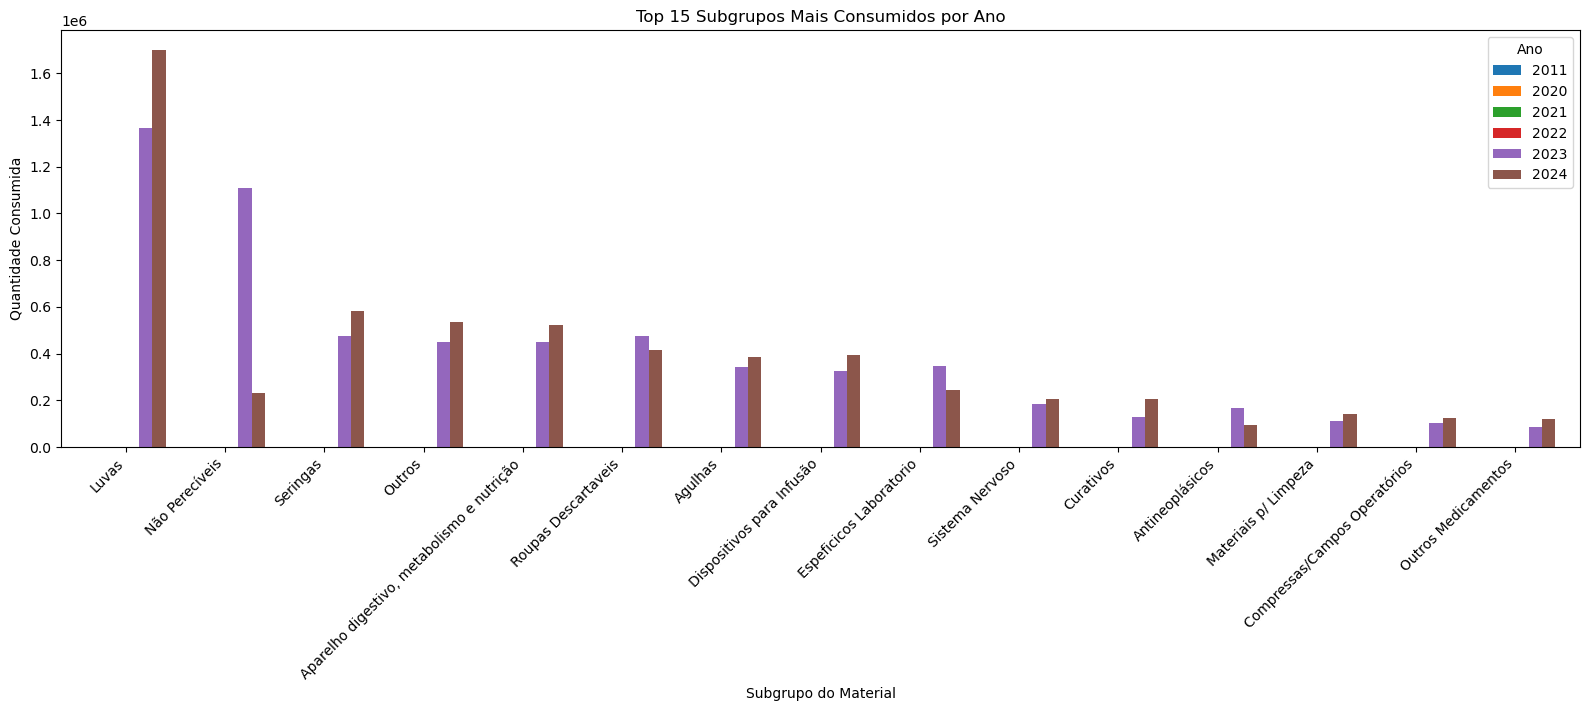

In [216]:
# Apresentar os top 15 materiais (subgrupos) mais consumidos dos últimos anos (apresentando por ano)

# Gráfico único: top 15 subgrupos mais consumidos dos últimos anos, mostrando o consumo por ano em barras agrupadas
# Correção: o gráfico mostra o consumo total (qt_consumo) dos 15 subgrupos mais consumidos, por ano

df_aux = pd.merge(
    movimentacoes,
    itens[['id_item', 'ds_subgrupo_material']],
    left_on='id_item',
    right_on='id_item',
    how='left'
)

df_aux['ano'] = pd.to_datetime(df_aux['dt_movimento_estoque'], errors='coerce').dt.year

# Soma total de consumo por subgrupo (usando qt_consumo)
consumo_total = df_aux.groupby('ds_subgrupo_material')['qt_consumo'].sum()
top_subgrupos = consumo_total.sort_values(ascending=False).head(15).index

# Filtra apenas os top 15 subgrupos
dados_plot = df_aux[df_aux['ds_subgrupo_material'].isin(top_subgrupos)]

# Soma o consumo por subgrupo e ano
contagem = (
    dados_plot.groupby(['ds_subgrupo_material', 'ano'])['qt_consumo']
    .sum()
    .unstack(fill_value=0)
    .loc[top_subgrupos]  # garante a ordem dos subgrupos
)

# Plota gráfico de barras agrupadas
ax = contagem.plot(kind='bar', figsize=(16,8), width=0.8)
plt.xlabel('Subgrupo do Material')
plt.ylabel('Quantidade Consumida')
plt.title('Top 15 Subgrupos Mais Consumidos por Ano')
plt.legend(title='Ano')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


In [21]:
# Apresentar os 15 materiais (subgrupos) menos consumidos dos últimos anos (apresentando por ano)


In [22]:
# Selecionar algumas especialidades médicas com consumos acima da média dos últimos anos (apresentando por ano)


In [23]:
# Apresentar materiais com estoques parados nos últimos anos (apresentando por ano)


## Extrair mais 3 principais informações da base e elaborem os gráficos para visualizá-las. Cada código em uma célula separada

In [ ]:
#verificando qual item foi mais utilizado nos últimos anos a partir da base movimentações
